# The Spark Foundation :  GRIP  Jan-2021

## Task-5 : Exploratory Data Analysis - Sports

### Description : As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team. And Suggest teams or players a company should endorse for its products.

# Auther : Balaji Patil

## Importing libraries

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Loading Datasets

In [103]:
matches_data = pd.read_csv('matches.csv')
deliveries_data = pd.read_csv('deliveries.csv')

In [104]:
#Checking the first, five rows of mactches dataset

matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [105]:
#Checking shape of the matches dataset

matches_data.shape

(756, 18)

In [106]:
#Checking first, five rows of the deliveries dataset

deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [107]:
#Checking shape of the deliveries dataset

deliveries_data.shape

(179078, 21)

In [108]:
#Checking the data types of all features from matches dataset

matches_data.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [109]:
#Checking the data types of all features from deliveries dataset

deliveries_data.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

## Team who Won Maximum Matches

In [110]:
most_winners = matches_data['winner'].value_counts()
most_winners.head().reset_index()

,index,winner
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82


### From abow we can see that Mumbai Indians won the Maximum Matches

## CountPlot which shows the Team who won the Maximum matches

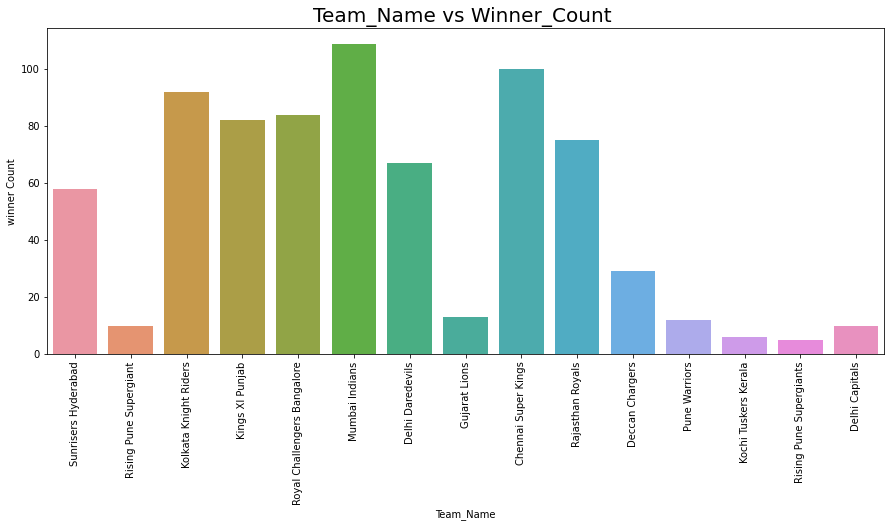

In [111]:
plt.figure(figsize=(15,6))
sns.countplot('winner', data=matches_data)
plt.xlabel('Team_Name')
plt.ylabel('winner Count')
plt.title('Team_Name vs Winner_Count ', fontsize=20)
plt.xticks(rotation=90)
plt.show()

## Batsman who has Maximum Runs 

In [112]:
succ_players2 = deliveries_data.groupby(['batsman'])['batsman_runs'].agg(['sum']).reset_index().sort_values('sum', ascending=False).reset_index(drop=True)
succ_players2.head()


,batsman,sum
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632


### From abow we can see that Virat Kohli has Maximum Runs

## Player who won the Player_of_Matche Trophy Maximum times

In [113]:
matches_data['player_of_match'].value_counts().reset_index().head()

,index,player_of_match
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,MS Dhoni,17
4,RG Sharma,17


### From abow we can see that CH Gayle won the Player_of_Match trophy maximum times

## Top 10 Players who won the Player_of_Match Trophy Maximum Times

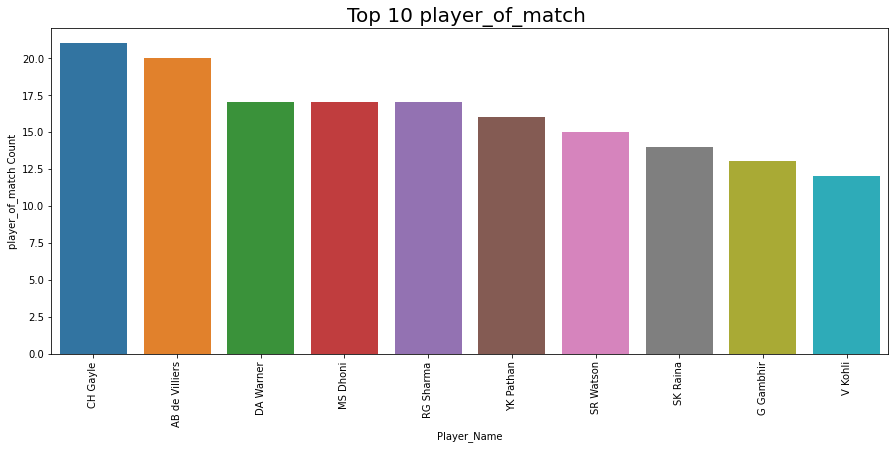

In [114]:
plt.figure(figsize=(15,6))
sns.barplot(matches_data['player_of_match'].value_counts()[:10].index, matches_data['player_of_match'].value_counts()[:10].values)
plt.xlabel('Player_Name')
plt.ylabel('player_of_match Count')
plt.title('Top 10 player_of_match ', fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [115]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [116]:
#Checking who won the Toss maximu times

matches_data['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

### From abow we can see that Mumbai Indians won the Toss Maximum times

## CountPlot to Check Team who won Toss Maximum Times

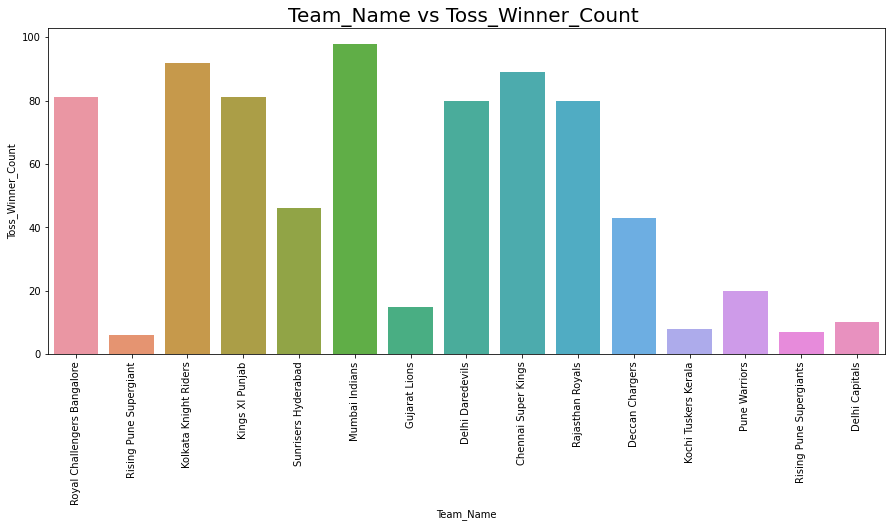

In [117]:
plt.figure(figsize=(15,6))
sns.countplot('toss_winner', data=matches_data)
plt.xlabel('Team_Name')
plt.ylabel('Toss_Winner_Count')
plt.title('Team_Name vs Toss_Winner_Count ', fontsize=20)
plt.xticks(rotation=90)
plt.show()

# To Check Toss_Decision Effect on Winning

In [118]:
winner1 = matches_data.groupby(['toss_winner', 'toss_decision'])['winner'].agg(['count']).reset_index().sort_values('count', ascending=False).reset_index(drop=True)
winner1

,toss_winner,toss_decision,count
0,Kolkata Knight Riders,field,62
1,Royal Challengers Bangalore,field,60
2,Kings XI Punjab,field,55
3,Mumbai Indians,field,54
4,Delhi Daredevils,field,51
5,Chennai Super Kings,bat,48
6,Rajasthan Royals,field,46
7,Mumbai Indians,bat,44
8,Chennai Super Kings,field,41
9,Rajasthan Royals,bat,32


### From abow we can see that Kolkata Knight Riders won the Toss and choose to Field and won 62 Matches and Royal Challengers Bangalore won the Toss and choose to Field and won 60 Matches

## To check in each Season how many Matches played

In [119]:
matches_data['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

# CountPlot to check Matches Played in each Season

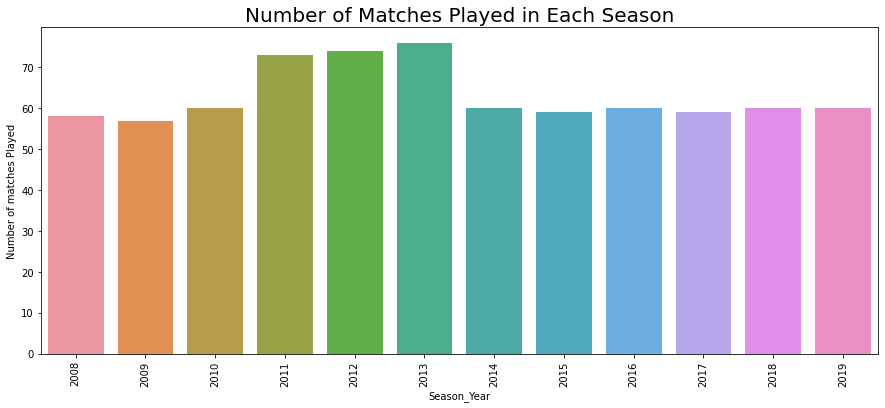

In [120]:
plt.figure(figsize=(15,6))
sns.countplot('season', data=matches_data)
plt.xlabel('Season_Year')
plt.ylabel('Number of matches Played')
plt.title('Number of Matches Played in Each Season', fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [121]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# To check Venue Effect on Winning

In [122]:
winner2 = matches_data.groupby(['venue','winner'])['winner'].agg(['count']).reset_index().sort_values('count', ascending=False).reset_index(drop=True)
winner2

,venue,winner,count
0,Eden Gardens,Kolkata Knight Riders,45
1,Wankhede Stadium,Mumbai Indians,42
2,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,34
3,M Chinnaswamy Stadium,Royal Challengers Bangalore,34
4,Sawai Mansingh Stadium,Rajasthan Royals,32
...,...,...,...
241,M. Chinnaswamy Stadium,Mumbai Indians,1
242,"MA Chidambaram Stadium, Chepauk",Pune Warriors,1
243,"MA Chidambaram Stadium, Chepauk",Rajasthan Royals,1
244,Maharashtra Cricket Association Stadium,Gujarat Lions,1


## From abow we can see that Kolkata Knight Riders	won the 45 Matches in Eden Gardens Stadium and Mumbai Indians won 42 Matches in Wankhede Stadium

In [123]:
winner3 = matches_data.groupby(['win_by_runs','win_by_wickets', 'winner'])['winner'].agg(['count']).reset_index().sort_values('count', ascending=False).reset_index(drop=True)
winner3

,win_by_runs,win_by_wickets,winner,count
0,0,6,Kings XI Punjab,18
1,0,5,Mumbai Indians,12
2,0,5,Chennai Super Kings,12
3,0,7,Kolkata Knight Riders,11
4,0,8,Kolkata Knight Riders,11
...,...,...,...,...
363,14,0,Sunrisers Hyderabad,1
364,15,0,Chennai Super Kings,1
365,15,0,Delhi Daredevils,1
366,15,0,Kings XI Punjab,1


### From abow we can see that Kings XI Punjab won 18 times by 6 wickets Mumbai Indians won 12 times by 5 wickets

# Conclusion : 

## Most_Scuccesful_Team : The Team is Mumbai Indians because Mumbai Indians won the Maximum Matches (109 Matches) and also wom Maximum Seasons

# Most_Scuccesful_Player :

## - As per Runs is Virat Kohli who has Maximum Runs (5434 Runs) 

## - As per Player_of_Matches is CH Gayle who won Maximum Player_of_Matches Trophy (21 Times)

# A Teams & Players, company should endorse for its products is : 

## - Mumbai Indians, Chennai Super Kings who won Maximum Matches

## - Virat Kohli, SK Raina who has Maximum Runs and CH Gayle who won Player_of_Matches Trophy Maximum Times